In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!pip install findspark

In [20]:
!pip install pyspark

In [21]:
import findspark
from pyspark.sql.functions import to_date, col, split, char_length, lit, trim
# findspark.init()
from pyspark.sql import SparkSession
# Create a SparkSession
spark = SparkSession.builder.getOrCreate()
# spark = SparkSession.builder.appName("app_name").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")
df = spark.read.format('csv').option('header', True)\
          .option('inferSchema', True)\
          .option('sep', ',')\
          .load('/content/drive/MyDrive/DATA_ENGINEER/DATABRICKS/AAAA_________IAM___CODING_____Colab Notebooks/Learning/datasset/AFCON/Africa Cup of Nations Players.csv')

df.printSchema()
df.show(10)


root
 |-- _c0: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- ShirtNumber: string (nullable = true)
 |-- PlayerPosition: string (nullable = true)
 |-- PlayerName: string (nullable = true)
 |-- DateofBirth(age): string (nullable = true)
 |-- Caps: string (nullable = true)
 |-- Goals: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Country: string (nullable = true)

+---+----+-----------+--------------+--------------------+--------------------+----+-----+---------+-------+
|_c0|Year|ShirtNumber|PlayerPosition|          PlayerName|    DateofBirth(age)|Caps|Goals|     Club|Country|
+---+----+-----------+--------------+--------------------+--------------------+----+-----+---------+-------+
|  0|1957|       NULL|            GK|            Ali Bakr|                NULL|NULL| NULL|  Zamalek|  Egypt|
|  1|1957|       NULL|            GK|"Paraskos ""Brasc...|                NULL|NULL| NULL| El-Qanah|  Egypt|
|  2|1957|       NULL|            GK| Abdel-Galil

## Remove space in columns and rows

In [22]:
# Create a list of tuples where the first element is the old column name and the second element is the new column name
rename_columns = [(c, c.strip()) for c in df.columns]

# Use the withColumnRenamed method with a dictionary to rename multiple columns

for current_name, new_name in rename_columns:
    df = df.withColumnRenamed(current_name, new_name)
    df = df.withColumn(new_name, trim(df[new_name]))


# Print the schema of the renamed DataFrame
df.printSchema()
df.show(10)

root
 |-- _c0: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- ShirtNumber: string (nullable = true)
 |-- PlayerPosition: string (nullable = true)
 |-- PlayerName: string (nullable = true)
 |-- DateofBirth(age): string (nullable = true)
 |-- Caps: string (nullable = true)
 |-- Goals: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Country: string (nullable = true)

+---+----+-----------+--------------+--------------------+--------------------+----+-----+---------+-------+
|_c0|Year|ShirtNumber|PlayerPosition|          PlayerName|    DateofBirth(age)|Caps|Goals|     Club|Country|
+---+----+-----------+--------------+--------------------+--------------------+----+-----+---------+-------+
|  0|1957|       NULL|            GK|            Ali Bakr|                NULL|NULL| NULL|  Zamalek|  Egypt|
|  1|1957|       NULL|            GK|"Paraskos ""Brasc...|                NULL|NULL| NULL| El-Qanah|  Egypt|
|  2|1957|       NULL|            GK| Abdel-Galil H

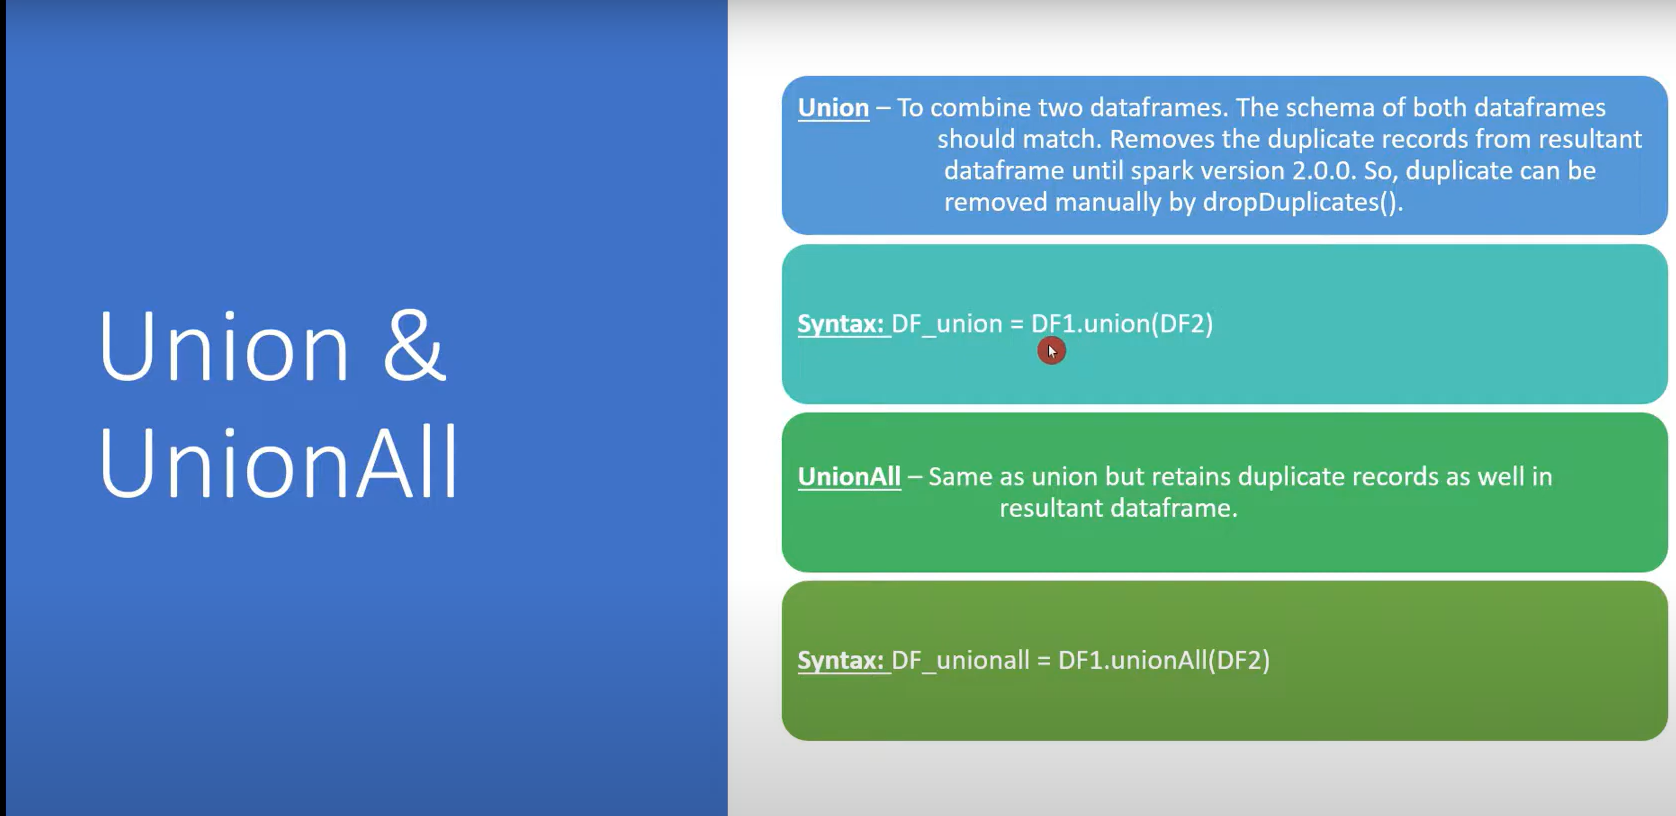






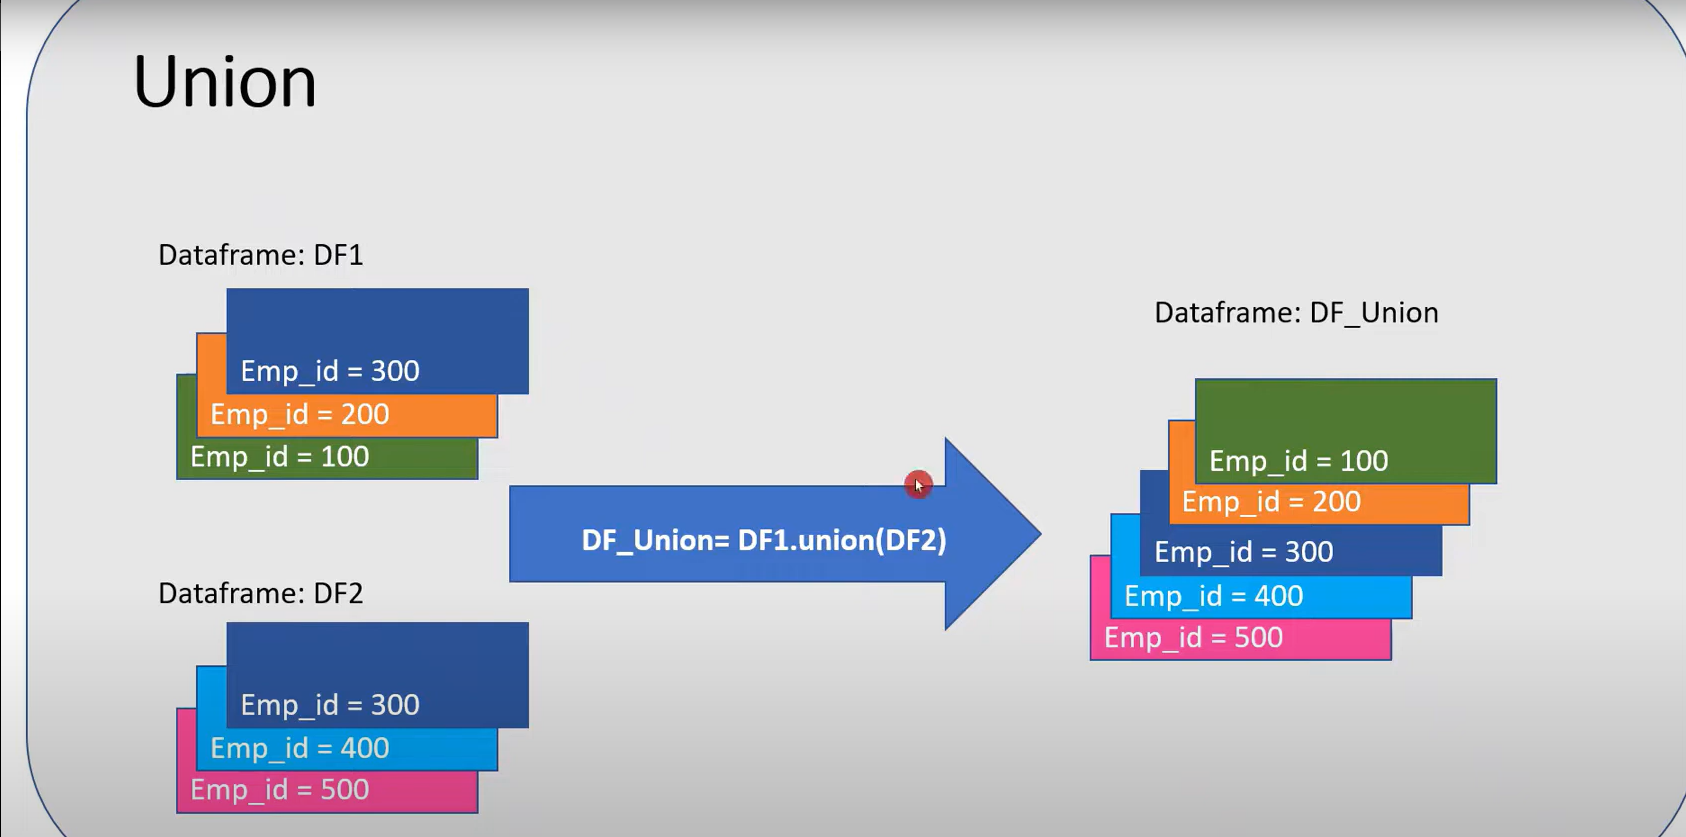

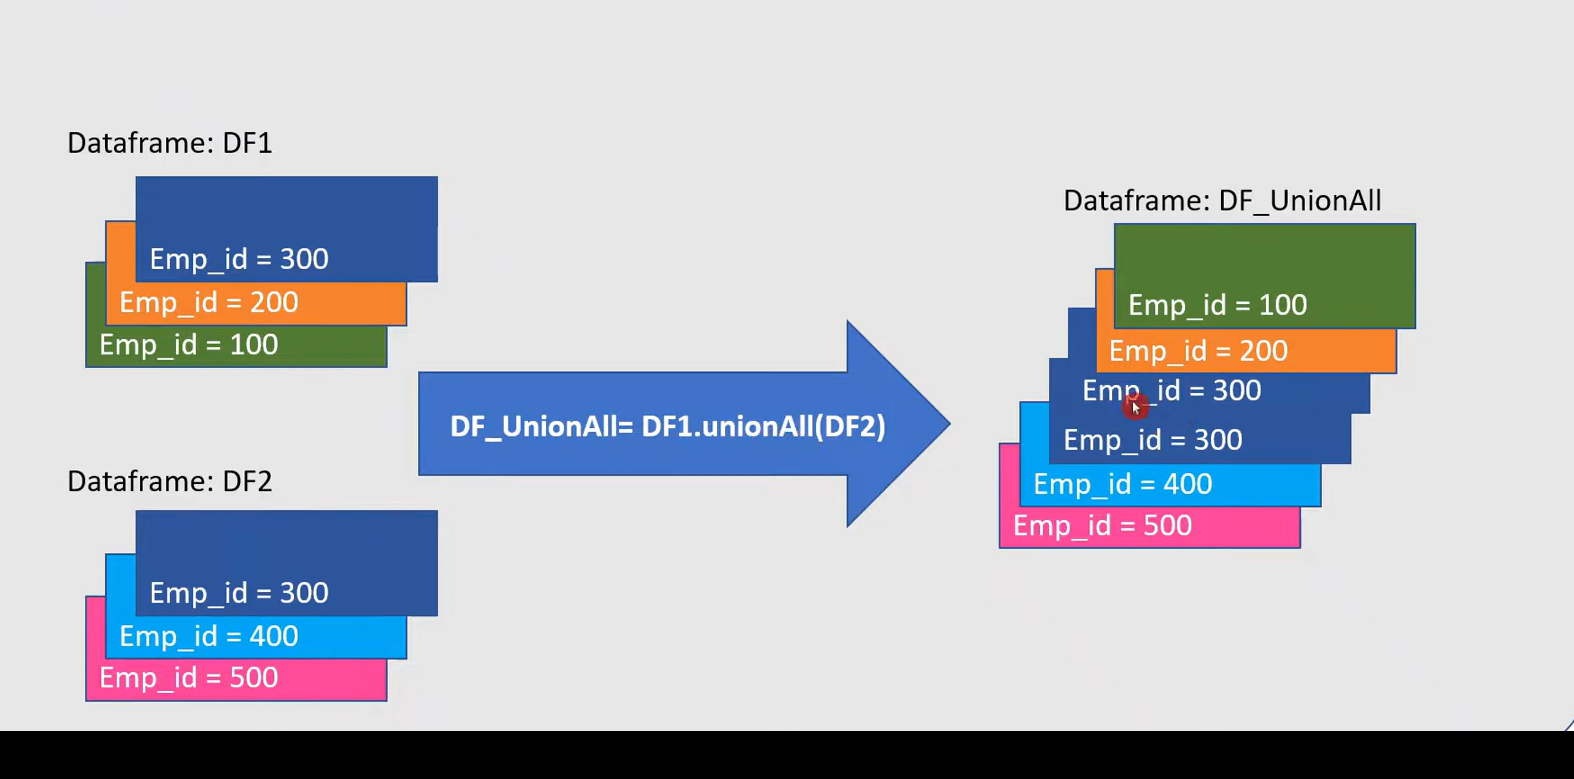

In [27]:
# Create the DataFrame
schema = ["id", "name", "age", "department", "salary"]
data1 = [(1, "Alice", 25, "Marketing", 50000),
       (2, "Bob", 30, "Sales", 60000),
       (3, "Charlie", 40, "HR", 45000),
      (13, "Michael", 27, "Marketing", 47000),
       (4, "David", 35, "Finance", 55000),
       (5, "Eve", 28, "Marketing", 48000),
       (6, "Frank", 50, "Sales", 70000),
       (7, "George", 45, "HR", 52000),
       (8, "Hannah", 32, "Finance", 58000),
       (9, "Ian", 24, "Marketing", 46000),
       (10, "Jack", 38, "Sales", 62000),]

employee_data_df1 = spark.createDataFrame(data=data1, schema=schema)
employee_data_df1.show()
date2 = [(11, "Karen", 42, "HR", 54000),
      (12, "Lily", 33, "Finance", 57000),
      (13, "Michael", 27, "Marketing", 47000),
      (14, "Nancy", 55, "Sales", 75000),
      (15, "Oliver", 48, "HR", 56000),
      (16, "Peter", 36, "Finance", 59000),
      (17, "Quinn", 29, "Marketing", 49000),
      (18, "Rachel", 52, "Sales", 72000),
       (6, "Frank", 50, "Sales", 70000),
       (7, "George", 45, "HR", 52000),
       (8, "Hannah", 32, "Finance", 58000),
      (19, "Sarah", 43, "HR", 53000),
      (20, "Thomas", 34, "Finance", 58000)]
employee_data_df2 = spark.createDataFrame(data=data2, schema=schema)
employee_data_df2.show()

+---+-------+---+----------+------+
| id|   name|age|department|salary|
+---+-------+---+----------+------+
|  1|  Alice| 25| Marketing| 50000|
|  2|    Bob| 30|     Sales| 60000|
|  3|Charlie| 40|        HR| 45000|
| 13|Michael| 27| Marketing| 47000|
|  4|  David| 35|   Finance| 55000|
|  5|    Eve| 28| Marketing| 48000|
|  6|  Frank| 50|     Sales| 70000|
|  7| George| 45|        HR| 52000|
|  8| Hannah| 32|   Finance| 58000|
|  9|    Ian| 24| Marketing| 46000|
| 10|   Jack| 38|     Sales| 62000|
+---+-------+---+----------+------+

+---+-------+---+----------+------+
| id|   name|age|department|salary|
+---+-------+---+----------+------+
| 11|  Karen| 42|        HR| 54000|
| 12|   Lily| 33|   Finance| 57000|
| 13|Michael| 27| Marketing| 47000|
| 14|  Nancy| 55|     Sales| 75000|
| 15| Oliver| 48|        HR| 56000|
| 16|  Peter| 36|   Finance| 59000|
| 17|  Quinn| 29| Marketing| 49000|
| 18| Rachel| 52|     Sales| 72000|
| 19|  Sarah| 43|        HR| 53000|
| 20| Thomas| 34|   Finance

## Union

In [33]:
df = employee_data_df1.union(employee_data_df2)
df.show()
df.dropDuplicates().orderBy(df.id, ascending=True).show()

+---+-------+---+----------+------+
| id|   name|age|department|salary|
+---+-------+---+----------+------+
|  1|  Alice| 25| Marketing| 50000|
|  2|    Bob| 30|     Sales| 60000|
|  3|Charlie| 40|        HR| 45000|
| 13|Michael| 27| Marketing| 47000|
|  4|  David| 35|   Finance| 55000|
|  5|    Eve| 28| Marketing| 48000|
|  6|  Frank| 50|     Sales| 70000|
|  7| George| 45|        HR| 52000|
|  8| Hannah| 32|   Finance| 58000|
|  9|    Ian| 24| Marketing| 46000|
| 10|   Jack| 38|     Sales| 62000|
| 11|  Karen| 42|        HR| 54000|
| 12|   Lily| 33|   Finance| 57000|
| 13|Michael| 27| Marketing| 47000|
| 14|  Nancy| 55|     Sales| 75000|
| 15| Oliver| 48|        HR| 56000|
| 16|  Peter| 36|   Finance| 59000|
| 17|  Quinn| 29| Marketing| 49000|
| 18| Rachel| 52|     Sales| 72000|
| 19|  Sarah| 43|        HR| 53000|
+---+-------+---+----------+------+
only showing top 20 rows

+---+-------+---+----------+------+
| id|   name|age|department|salary|
+---+-------+---+----------+------+
| 

## Union All

In [36]:
df2 = employee_data_df1.unionAll(employee_data_df2)
df2.show()

+---+-------+---+----------+------+
| id|   name|age|department|salary|
+---+-------+---+----------+------+
|  1|  Alice| 25| Marketing| 50000|
|  2|    Bob| 30|     Sales| 60000|
|  3|Charlie| 40|        HR| 45000|
| 13|Michael| 27| Marketing| 47000|
|  4|  David| 35|   Finance| 55000|
|  5|    Eve| 28| Marketing| 48000|
|  6|  Frank| 50|     Sales| 70000|
|  7| George| 45|        HR| 52000|
|  8| Hannah| 32|   Finance| 58000|
|  9|    Ian| 24| Marketing| 46000|
| 10|   Jack| 38|     Sales| 62000|
| 11|  Karen| 42|        HR| 54000|
| 12|   Lily| 33|   Finance| 57000|
| 13|Michael| 27| Marketing| 47000|
| 14|  Nancy| 55|     Sales| 75000|
| 15| Oliver| 48|        HR| 56000|
| 16|  Peter| 36|   Finance| 59000|
| 17|  Quinn| 29| Marketing| 49000|
| 18| Rachel| 52|     Sales| 72000|
| 19|  Sarah| 43|        HR| 53000|
+---+-------+---+----------+------+
only showing top 20 rows



## Schema Mismatch

In [38]:
df3 = df2.select(df2['name'], df2['age'], df2['department'])
df3.show()
df3.union(df2)

+-------+---+----------+
|   name|age|department|
+-------+---+----------+
|  Alice| 25| Marketing|
|    Bob| 30|     Sales|
|Charlie| 40|        HR|
|Michael| 27| Marketing|
|  David| 35|   Finance|
|    Eve| 28| Marketing|
|  Frank| 50|     Sales|
| George| 45|        HR|
| Hannah| 32|   Finance|
|    Ian| 24| Marketing|
|   Jack| 38|     Sales|
|  Karen| 42|        HR|
|   Lily| 33|   Finance|
|Michael| 27| Marketing|
|  Nancy| 55|     Sales|
| Oliver| 48|        HR|
|  Peter| 36|   Finance|
|  Quinn| 29| Marketing|
| Rachel| 52|     Sales|
|  Sarah| 43|        HR|
+-------+---+----------+
only showing top 20 rows



AnalysisException: [NUM_COLUMNS_MISMATCH] UNION can only be performed on inputs with the same number of columns, but the first input has 3 columns and the second input has 5 columns.;
'Union false, false
:- Project [name#1053, age#1054L, department#1055]
:  +- Union false, false
:     :- LogicalRDD [id#1052L, name#1053, age#1054L, department#1055, salary#1056L], false
:     +- LogicalRDD [id#1083L, name#1084, age#1085L, department#1086, salary#1087L], false
:- LogicalRDD [id#1460L, name#1461, age#1462L, department#1463, salary#1464L], false
+- LogicalRDD [id#1465L, name#1466, age#1467L, department#1468, salary#1469L], false
